# Superstore Marketing Campaign Data Analysis using Logistic Regression And Decision Tree

## Background

The superstore is going to organize a new marketing campaign this year and want to invite the customers to join the upcoming campaign.

To reduce the cost of invitation and better utilize the capacity of the campaign venue, 

the supermarket requests data analysis to identify which type of customers are the high potential participants (more willing to accept the campaign 
offer from superstore) based on last year's campaign data and sends the invitation to the high potential customers. 

Also, the superstore requests advice about the improvements we are able to make based on last year's campaign data.

## Requirement

- Identify the customer with high potential
- Which type of the product should be the focus on the upcoming event
- Whether offering the delivery service in the campaign can boost the revenue of the campaign
- Whether offering a child care service in the campaign can boost the revenue of the campaign
- Other suggestion made

## Last year marketing campaign data

In [445]:
Variable =  ["Response" ,"ID","Year_Birth" ,"Complain","Dt_Customer","Education","Maritial","Kidhome","Teenhome","Income","MntFishProducts","MntMeatProducts","MntFruits","MntSweetProducts","MntWines","MntGoldProd","NumDealsPurchases","NumCatalogPurchase","NumStorePurchases","NumWebPurchases","NumWebVisitsMonth","Recency"] 

Description = ['1 if customer accepted the offer in the last campaign, 0 otherwise','Unique ID of each customer','Age of the customer','1 if the customer compalined in the last 2 years ','date of the customers enrollment with the company','level of Education','customers maritial status','number of small children in customers household','number of teenagers in customers household','customers yearly household income','the amount spent on fish products in the last 2 years','the amount spent on meant products in the last 2 years','the amount spent on fruits product in the last 2 years','the amount spent on sweet products in the last 2 years','the amount spent on wine products in the last 2 years','the amount spent on gold products in the last 2 years','number of purchase made with discount','number of purchasee made using catalog (buying goods to be shipped through the mail)','number of purchase made directly in stores','number of purchase made through the companys website','number of visits to companys website in the last month','number of days since the last purchase']

Variable = pd.DataFrame(Variable)
Description = pd.DataFrame(Description)
data_name = pd.concat([Variable, Description], axis = 1)
data_name.columns = ["Variable","Description"]
data_name

,Variable,Description
0,Response,1 if customer accepted the offer in the last c...
1,ID,Unique ID of each customer
2,Year_Birth,Age of the customer
3,Complain,1 if the customer compalined in the last 2 years
4,Dt_Customer,date of the customers enrollment with the company
5,Education,level of Education
6,Maritial,customers maritial status
7,Kidhome,number of small children in customers household
8,Teenhome,number of teenagers in customers household
9,Income,customers yearly household income


## Python library

In [413]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## Import the dataset

In [97]:
data =pd.read_csv("superstore_data.csv")

## Viewing the dataset

In [130]:
#showing the shape of the dataset
print("The shape of the dataset: "+str(data.shape[0]) +" X "+ str(data.shape[1])+"\n")

# showing the 3 data in the dataset
print(data.head(3))


The shape of the dataset: 2240 X 22

      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   
2            30                  1                3                    2   

   NumStorePurchases  NumWebVisitsMo

## Data Cleansing

* check missing value in the dataset
* check the data with impossible value
* check the data type of each column

### Check missing value in the dataset

In [8]:
# check the number of missing value in each of the columns
print(data.isna().sum())

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [99]:
# Discard the record with missing value
data_subset = data.dropna(axis=0)

# check whether the record with missing data is discarded
print(data_subset.shape)

(2216, 22)


### Check the data with impossible value

In [108]:
# chect whether there is any impossible data in the dataset for example the record with negative Income
print(data_subset.describe())

                 Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000  

In [218]:
print("\n From the above, there is no data with impossible value at first glance")


 From the above, there is no data with impossible value at first glance


### Check the data type of each column

In [143]:
#showing the data type of each column in the dataset
print(data_subset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2217 entries, 0 to Age
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2216 non-null   float64       
 1   Year_Birth           2216 non-null   float64       
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   float64       
 6   Teenhome             2216 non-null   float64       
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   float64       
 9   MntWines             2216 non-null   float64       
 10  MntFruits            2216 non-null   float64       
 11  MntMeatProducts      2216 non-null   float64       
 12  MntFishProducts      2216 non-null   float64       
 13  MntSweetProducts     2216 non-null   fl

In [128]:
print("\n There is no column with wrong data type")


 There is no column with wrong data type


## Feature Engineering

Data Transformation

- Transform the Year_Birth column from year ot birth to age format
- Transform the Dt_Customer column from date of the customer's enrollment with the company to the years enrolled in the company
- Label Encoding the ordinal value in the Education column
- One Hot Encoding the Marital State column
- Discard the irrelevant columns

### Transform the Year_Birth column from year birth to age format

In [101]:
# Transform the Year_Birth column

data_subset.loc[:,"Year_Birth"] = 2024 - data_subset["Year_Birth"]
data_subset = data_subset.rename(columns = {"Year_Birth":"Age"})

In [225]:
# Validate the transfomred data 

print(data_subset["Age"].describe())

count    2216.000000
mean       55.179603
std        11.985554
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64


From the information in [https://www.sciencefocus.com/the-human-body/oldest-person-in-the-world], the oldest person has the age of 116.
Therefore, the record with age 131 is invalid. 
To deal with the issue, discard the record.

In [156]:
# Check the number of record with age higher than 116
(data_subset["Age"]>116).sum()

3

In [103]:
#Discard the record with age higher than 116
data_subset = data_subset[data_subset["Age"]<116]

In [160]:
#Check the shape of the dataset
data_subset.shape

(2213, 22)

### Transform the Dt_Customer column from date of the customer enrollment with the company to the years enrolled in the company

In [105]:
#Transform the Dt_Customer columns
data_subset["Years_Customer"] = 2024 - data_subset["Dt_Customer"].str[-4:].astype(int)
data_subset = data_subset.drop(columns= "Dt_Customer")

In [165]:
#Validate the transfomred data
data_subset["Years_Customer"].describe()

count    2213.000000
mean       10.971984
std         0.685771
min        10.000000
25%        11.000000
50%        11.000000
75%        11.000000
max        12.000000
Name: Years_Customer, dtype: float64

From the above, the data is valid

### Label Encoding the ordinal value in the Education column

In [169]:
#Show the value in the Education column
data_subset["Education"].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

The Education label shown below:

* Basic: 1
* Graduation: 2
* 2n Cycle: 3
* Master: 4
* PhD: 5

In [107]:
#Define the match key
key={"Basic":1, "Graduation":2, "2n Cycle":3, "Master":4, "PhD":5}

In [109]:
#Label Encoding
data_subset["Educations"]=data_subset["Education"].map(key)
data_subset = data_subset.drop(columns= "Education")

In [111]:
#Check whether key is assigned
data_subset["Educations"].unique()

array([2, 5, 3, 4, 1], dtype=int64)

From the above, the key is properly assigned

### One Hot Encoding the Marital Status column

In [113]:
data_subset = pd.get_dummies(data = data_subset, columns = ["Marital_Status"],dtype=int)

In [115]:
#Show the dataset after one hot encoding
data_subset.head(2)

,Id,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Years_Customer,Educations,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1826,54,84835.0,0,0,0,189,104,379,111,...,10,2,0,0,1,0,0,0,0,0
1,1,63,57091.0,0,0,0,464,5,64,7,...,10,2,0,0,0,0,1,0,0,0


### Discard the irrelevant columns

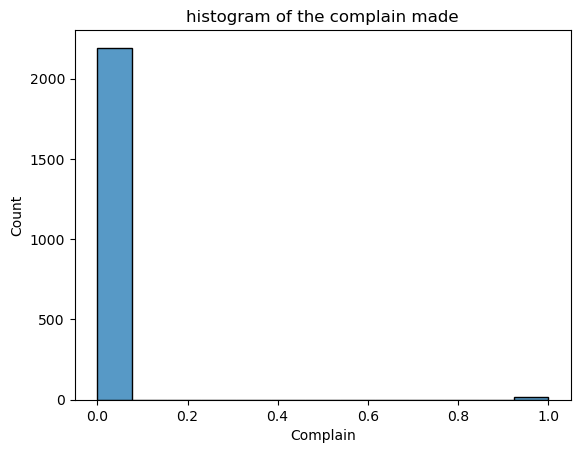

In [185]:
sns.histplot(x=data_subset["Complain"])
plt.title("histogram of the complain made")
plt.show()

From the above, it is seen that there is only a few complain case in the dataset. Complain column does not provide enough predictive power.
Therefore, it will be dropped

In [117]:
#Drop the Complain Column
data_subset = data_subset.drop(columns= "Complain")

In [239]:
#Check how many record associated to one Id

(data_subset.groupby("Id")["Response"].count() ==1).sum()

2213

From the above, the result shows that 2213 id associate with 2213 records.
That means one Id only associates with one record. 
The Id column does not provide much information. Therefore, discard the Id column

In [119]:
#Drop the Id column

data_subset = data_subset.drop(columns= "Id")

In [121]:
#Show the column name in the dataset

data_subset.columns

Index(['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Years_Customer', 'Educations', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

## Data Analysis with Logistic Regression

Logistic Regression is a model dealing with the dataset with categorical response variable and providing a clear explanation of impact of each predictor variable to response variable. 


To meet the requirement from the superstore (explanation of the insight) and the format of this dataset (categorical response variable), logisitc regression is used


This project uses Logistic Regression for analyzing the data instead of building a prediction model, therefore splitting the dataset into training data and testing data is not needed

In [279]:
#split the dataset into repsonse dataset and predictor dataset
X= data_subset.drop(columns = ['Response'])
y= data_subset["Response"]

In [281]:
#Forming the Logistic Regression
logistic_reg = LogisticRegression(max_iter =1000000, solver="sag")
model = logistic_reg.fit(X,y)

In [282]:
#Display the coefficient of the variable in the Logistic Regression in descending order
result_coef = pd.DataFrame({"column_name":X.columns, "coefficient":model.coef_[0]})
result_coef.sort_values(by="coefficient", ascending = False)

,column_name,coefficient
5,MntWines,1.988812e-03
7,MntMeatProducts,1.645440e-03
8,MntFishProducts,1.665720e-04
9,MntSweetProducts,1.484992e-04
6,MntFruits,1.472023e-04
10,MntGoldProds,1.328453e-04
13,NumCatalogPurchases,1.815429e-05
22,Marital_Status_Single,5.319834e-07
24,Marital_Status_Widow,2.079305e-07
20,Marital_Status_Divorced,1.486574e-07


Show how fit the model to the dataset

In [285]:
# Metric
metric = pd.DataFrame({"accuracy":[accuracy_score(y,model.predict(X))],
                       "Recall":[recall_score(y,model.predict(X))],
                       "Precision":[precision_score(y,model.predict(X))],
                       "F1":[f1_score(y,model.predict(X))]})
metric

,accuracy,Recall,Precision,F1
0,0.849977,0.012012,0.571429,0.023529


### Insight

Although the metrics do not show an eye-catching performance, the explanation from logistic regression can draw some good insight from dataset.

From the logistic regression result, the characteristics of customers who are more willing to accept the offer are shown below:
* Customers who purchase more wine or meat
* Customers who have a lower number of days since the last purchase
* Young customers

The factors having low impact on the response:
* Marital State
* Number of purchasee made using catalog (buying goods to be shipped through the mail)
* Number of small children in customer's household
* Number of teenagers in customer's household
* Number of purchase made through the company's website

## Data Analysis With Decision Tree

Decision Tree is a model that can provide a tree base explanation which can be used for deeper understanding of the dataset. 

In order to gain a deeper insight inside the dataset, Decision Tree is used afterwards.

A deep depth may decrease the explanation power of the tree, so a Decision Tree with max_depth = 3 is used in this section

In [289]:
#Building a Decision Tree
tree= DecisionTreeClassifier(random_state = 0, max_depth = 3)
model = tree.fit(data_subset.drop(columns=["Response"]), y)

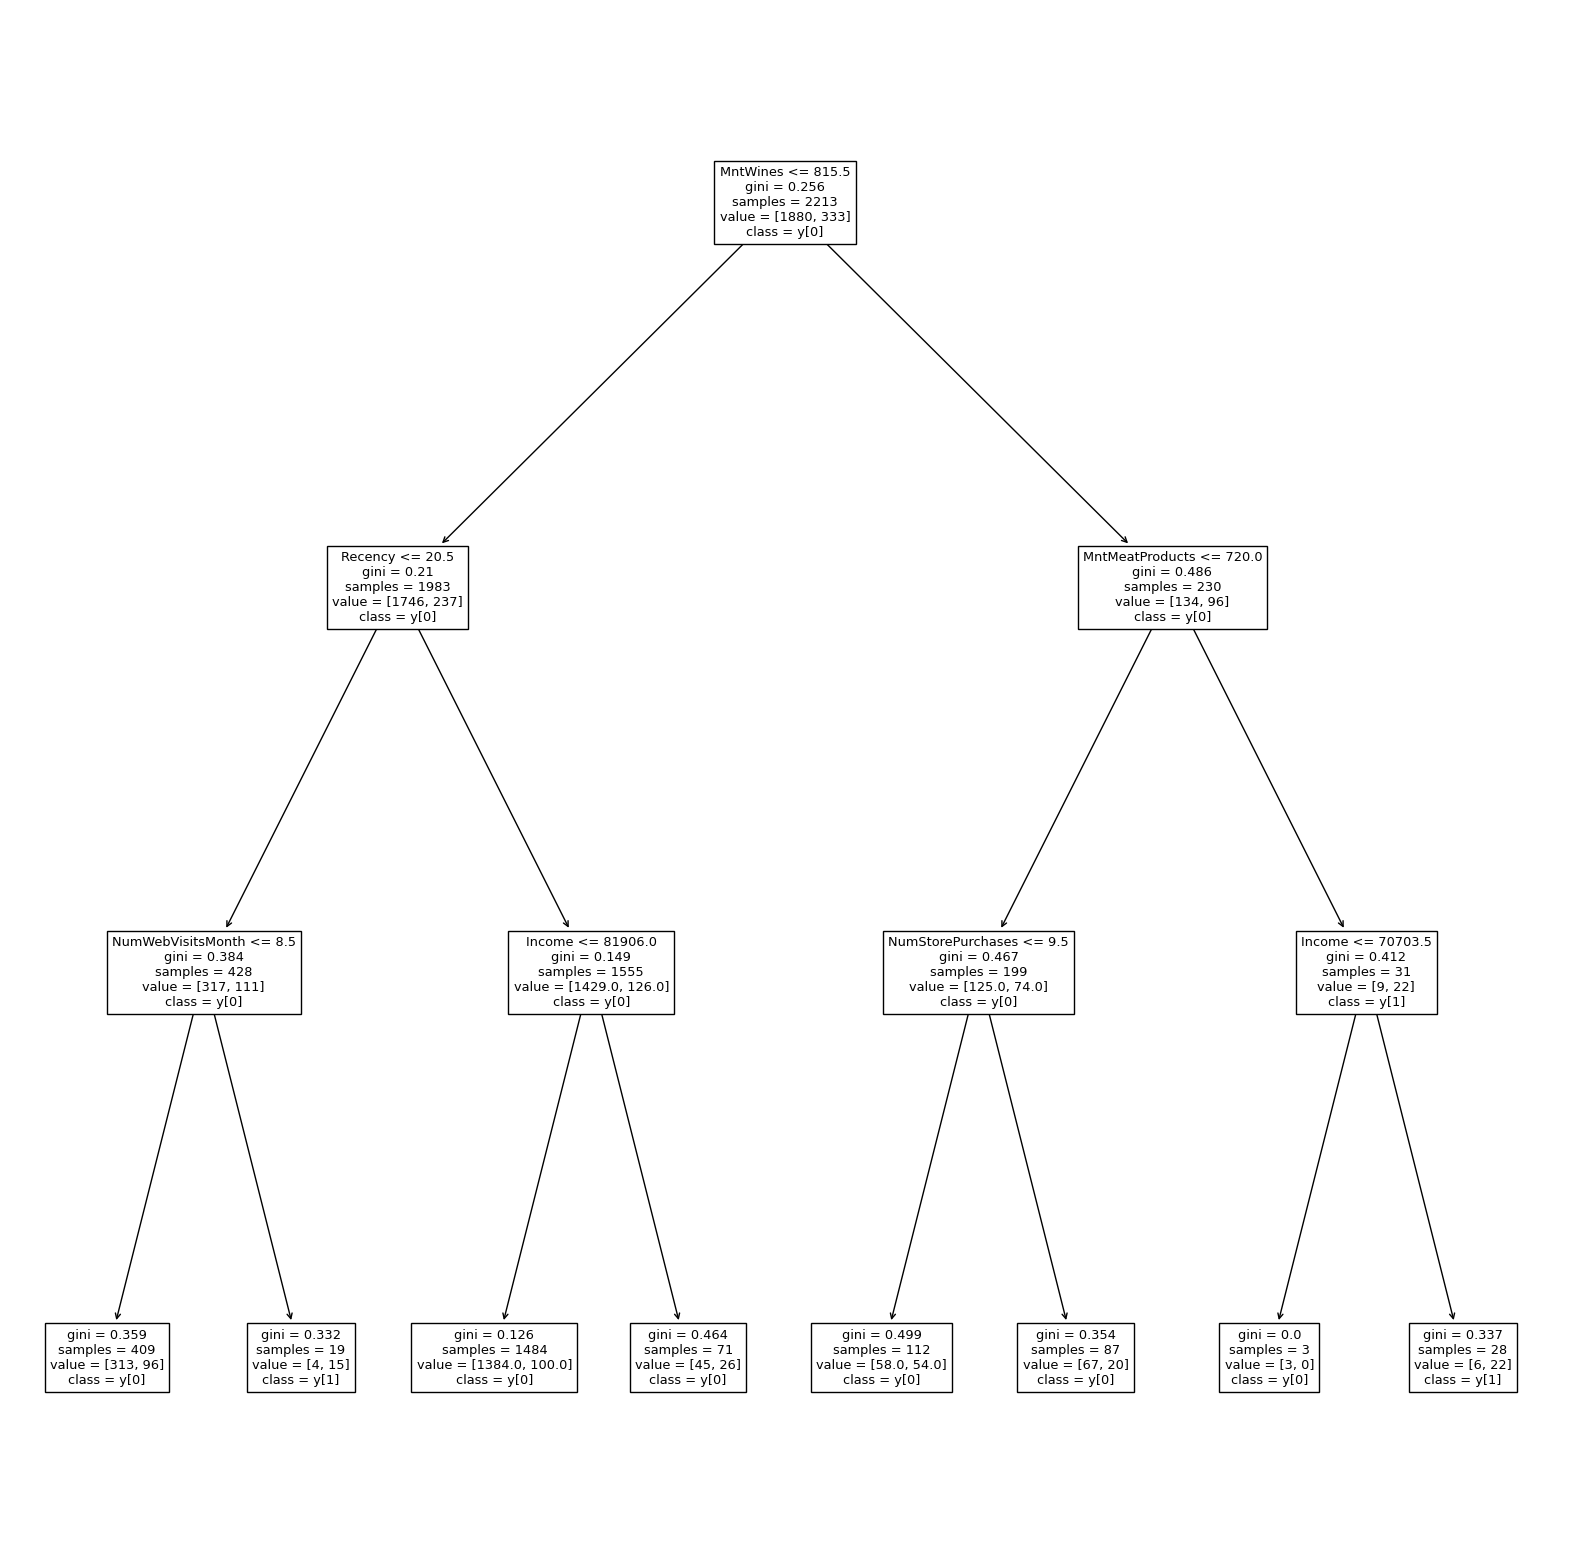

In [291]:
plt.figure(figsize = (20,20))
ast =plot_tree(model,feature_names=X.columns, class_names =True)
plt.show()

Show how fit the model to the dataset

In [293]:
metric = pd.DataFrame({"accuracy":[accuracy_score(y,model.predict(X))],
                       "Recall":[recall_score(y,model.predict(X))],
                       "Precision":[precision_score(y,model.predict(X))],
                       "F1":[f1_score(y,model.predict(X))]})
metric

,accuracy,Recall,Precision,F1
0,0.861726,0.111111,0.787234,0.194737


### Insight

From the metrics table, among those identified as high potential customers, 78.7% are really high potential which is higher than 57.14% in regression model, indicating that the decision tree provides a more trustworthy explanation.



From the tree diagram, two types customers are identified as customers with high potential (more willing to accept the offer from superstore)

The characteristics of the first type customers
* the amount spent on wine products in the last 2 years is lower than or equal to 815.5
* number of days since the last purchase is smaller or equal to 20.5
* number of visits to company's website in the last month is higher than 8.5

The characyeristics of the second type customers
* the amount spent on wine products in the last 2 years is higher than 815.5
* the amount spent on meant products in the last 2 years is higher than 720
* customer's yearly household income is higher than  70703.5



Analysis of these two types customers
* The first type customers are those who frequently purchase other than wine products. This type of customers may be house wife or worker who buy the daily use product from superstore to meet their daily requirement.

* The second type customers are high-paid people who buy more wine and meat. This type of customers may be the party men who hold friends meetings or parties on weekend, so they create a huge demand for wine and meat.

# Answer and Suggestion

Identify the customer with high potential
-  House wife or worker who buy the daily use product from superstore
-  Party men who hold friends meetings or parties on weekend
  
Which type of the product should be the focus on the upcoming event
-  Wine and Meat

Whether offering the delivery service in the campaign can boost the revenue of the campaign
-  No, as number of purchase through website is not a factor affecting the response a lot
  
Whether offering a child care service in the campaign can boost the revenue of the campaign
-  No, as number of small children in customer's household is not a factor affecting the response a lot

Other suggestion made
- Set two areas in the campaign: daily use product area and party product area, to better serve those two types of customers
- Offer more campaign information in the website can enhance the chance of first type customers accepting the offer

# Value of this business solution

To value this business solution, it is crucial to ensure that the high potential customers (more willing to accept the campaign offer) identified by using above measures are also the high-value customers. 

Definition of the high-value customers:
- Customers with income greater than top 25% income in the dataset, or
- Customers with total product purchase greater than top 25% total product purchase in the dataset

Definition of total product purchase:
- Sum of the purchase amount of wines, fruits, meat, fish, sweet and gold

Metrics:
- Proportion of the high potential high-value customers among the high potential customers
- Proportion of the high-value customers in the last campaign

Definition of success business solution:
- Proportion of the high potential high-value customers among the high potential customers > Proportion of the high-value customers in the last campaign

In [394]:
potential_customer = model.predict(X)

X["total_product_purchase"] = X['MntWines'] +X['MntFruits']+ X['MntMeatProducts']+ X['MntFishProducts'] +X['MntSweetProducts']+X['MntGoldProds']

# Calculate the total number of the high potential high-value customer 
num_high_value_customer_in_potenial_customer=X[(potential_customer==1) &((X["total_product_purchase"]>X["total_product_purchase"].quantile(0.75))|(X["Income"]>X["Income"].quantile(0.75)))].shape[0]

#Calculate total number of the high potential customer
num_potential_customer = X[(potential_customer==1)].shape[0]

In [398]:
# Calculate the proportion of the high potential high-value customer 
num_high_value_customer_in_potenial_customer/num_potential_customer *100

59.57446808510638

In [404]:
# Calculate the total number of the high-value customer in last campaign
num_high_value_customer_in_campaign_customer=X[(y==1) &((X["total_product_purchase"]>X["total_product_purchase"].quantile(0.75))|(X["Income"]>X["Income"].quantile(0.75)))].shape[0]

#Calculate total number of the customer in the last campaign
num_campaign_customer = X[(y==1)].shape[0]

# Calculate the proportion of the high-value customer in the last campaign
num_high_value_customer_in_campaign_customer/num_campaign_customer *100

54.65465465465466

### Value driven by this success solution:

From the above, it is expected that the proportion of the high-value customer in the upcoming campaign is 60% which is greater than 55% in the last campaign if this business solution is adopted.